In [2]:
import pandas as pd
import numpy as np

## **Data Ingestion**

In [3]:
# Adjust the display
pd.set_option("display.max_column", 50)
pd.set_option("display.max_row", 100)

# Load data
crime_data = pd.read_csv("crime.csv")

crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


## **Preliminary Data Analysis**

In [4]:
# Get the info of the data
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
# Get the statistical summary
crime_data.describe().round(2)

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7784664.00,7784664.00,7784617.00,7169816.00,7171188.00,7697816.00,7697816.00,7784664.00,7697816.00,7697816.00
mean,7026439.05,1185.92,11.29,22.75,37.48,1164601.27,1885782.86,2009.94,41.84,-87.67
std,3502656.77,703.13,6.95,13.85,21.54,16846.58,32275.31,6.26,0.09,0.06
min,634.00,111.00,1.00,1.00,0.00,0.00,0.00,2001.00,36.62,-91.69
25%,3792573.50,621.00,6.00,10.00,23.00,1152976.00,1859073.00,2005.00,41.77,-87.71
50%,7029327.00,1034.00,10.00,23.00,32.00,1166110.00,1890730.00,2009.00,41.86,-87.67
75%,10131129.25,1731.00,17.00,34.00,57.00,1176372.00,1909273.00,2015.00,41.91,-87.63
max,13056426.00,2535.00,31.00,50.00,77.00,1205119.00,1951622.00,2023.00,42.02,-87.52


In [6]:
# Get the number of rows and columns
crime_data.shape

(7784664, 22)

In [7]:
# Let us find out the features of this data
features = crime_data.columns
print(features)
print(len(features))

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')
22


## **Data Cleaning**

In [8]:
# Check for missing values
crime_data.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [9]:
# Drop missing values
crime_data.dropna(inplace=True)

In [10]:
# check for missing values again
crime_data.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [11]:
# Checking for number of rows and columns after dropping missing values
crime_data.shape

(7084435, 22)

In [12]:
# Check for duplicate values
print("No of duplicates: ", crime_data.duplicated().sum())

No of duplicates:  0


In [13]:
# Rename column headers with spaces
columns = crime_data.columns
new_cols = [col for col in columns if ' ' in col]
crime_data = crime_data.rename(columns={col: col.replace(' ', '_') for col in new_cols})
crime_data.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [14]:
# Create new columns for date
crime_data['Date'] = pd.to_datetime(crime_data['Date'])

crime_data['Year'] = crime_data['Date'].dt.year
crime_data['Month'] = crime_data['Date'].dt.month_name()
crime_data['Day_of_Week'] = crime_data['Date'].dt.day_name()

crime_data.head()

C:\Users\ncc666\AppData\Local\Temp\ipykernel_3876\1221981952.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['Date'] = pd.to_datetime(crime_data['Date'])


,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location,Month,Day_of_Week
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",September,Saturday
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",September,Friday
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",September,Saturday
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",September,Saturday
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)",September,Saturday


In [15]:
# Drop not so relevant features
crime_data = crime_data.drop(columns=['Case_Number', 'IUCR', 'X_Coordinate', 'Y_Coordinate', 'Location'])

## **Exploratory Data Analysis & Visualization**

In [16]:
# Check for the top 5 crimes
print("Top 5 Crimes: ", crime_data['Primary_Type'].value_counts().head())

Top 5 Crimes:  Primary_Type
THEFT              1499197
BATTERY            1299859
CRIMINAL DAMAGE     811905
NARCOTICS           669097
ASSAULT             465810
Name: count, dtype: int64


<Axes: xlabel='Primary_Type'>

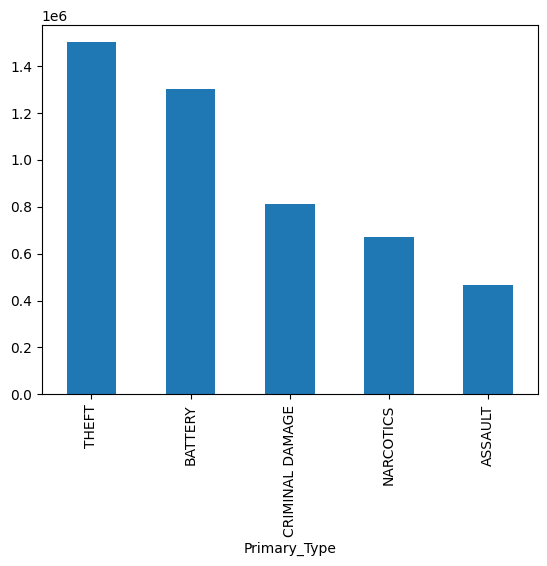

In [17]:
crime_data['Primary_Type'].value_counts().head().plot(kind = 'bar')

In [68]:
print("List of Years: ", crime_data['Year'].unique())
print("Number of Years: ", crime_data['Year'].nunique())

Year
2003    471995
2004    467132
2005    449868
2006    445499
2007    435532
2008    419794
2009    385849
2010    369805
2011    350905
2002    345026
2012    335099
2013    306325
2014    273610
2016    266482
2017    264156
2018    262835
2019    258161
2015    257788
2022    232552
2020    207439
2021    202246
2023     72449
2001      3888
Name: Primary_Type, dtype: int64

In [20]:
# Check for the year we had the highest crime
print("Year we had the highest crime: ", crime_data.groupby('Year')['Primary_Type'].count().sort_values(ascending=False))

Year we had the highest crime:  Year
2003    471995
2004    467132
2005    449868
2006    445499
2007    435532
2008    419794
2009    385849
2010    369805
2011    350905
2002    345026
2012    335099
2013    306325
2014    273610
2016    266482
2017    264156
2018    262835
2019    258161
2015    257788
2022    232552
2020    207439
2021    202246
2023     72449
2001      3888
Name: Primary_Type, dtype: int64
